In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from datetime import datetime,date,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [3]:
#Input Working directory or directory you want to work in
dirname=input("Enter the current working directory")
os.chdir(dirname)# Set current working directory
os.getcwd() # Get current working directory


Enter the current working directory/Users/shivamgoel/Desktop/Python/final


'/Users/shivamgoel/Desktop/Python/final'

In [4]:
airlines_data = pd.read_csv('data/airlines.csv',low_memory=False,error_bad_lines=False,warn_bad_lines=False, skipinitialspace=True)
airports_data = pd.read_csv('data/airports.csv',low_memory=False,error_bad_lines=False,warn_bad_lines=False, skipinitialspace=True)
flights = pd.read_csv('data/flights.csv',low_memory=False,error_bad_lines=False,warn_bad_lines=False, skipinitialspace=True,
                           na_values=['NA      ', 'NA    ', 'NA   ', 'NA', 'NA ', 'NA ', 'NaN', 'NAN', ''])

In [5]:
#Shapping Data
airlines_data.shape[0] #no of rows=14
airlines_data.shape[1] #no of columns=2

airports_data.shape[0] #no of rows=322
airports_data.shape[1] #no of columns=7

flights.shape[0] #no of rows = 5819079
flights.shape[1] #no of columns = 31
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
unique_flights_data = {}
for item in flights.columns:
    unique_flights_data[item] = flights[item].unique()
#unique_flights_data

In [7]:
day_of_week_desc={
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Saturday',
    7:'Sunday'
}
flights['DESC_DOW']=flights['DAY_OF_WEEK'].apply(lambda a:day_of_week_desc[a])


In [7]:
airlines_dict = dict(zip(airlines_data['IATA_CODE'],airlines_data['AIRLINE']))
airport_dict = dict(zip(airports_data['IATA_CODE'],airports_data['AIRPORT']))
flights['DESC_AIRLINE'] = flights['AIRLINE'].apply(lambda x: airlines_dict[x])
flights.head()['DESC_AIRLINE']

0      Alaska Airlines Inc.
1    American Airlines Inc.
2           US Airways Inc.
3    American Airlines Inc.
4      Alaska Airlines Inc.
Name: DESC_AIRLINE, dtype: object

# Trend of flight Cancellations

In [8]:
flights.dropna()
flights.CANCELLATION_REASON.unique()
flights.head()


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DESC_DOW
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Thursday


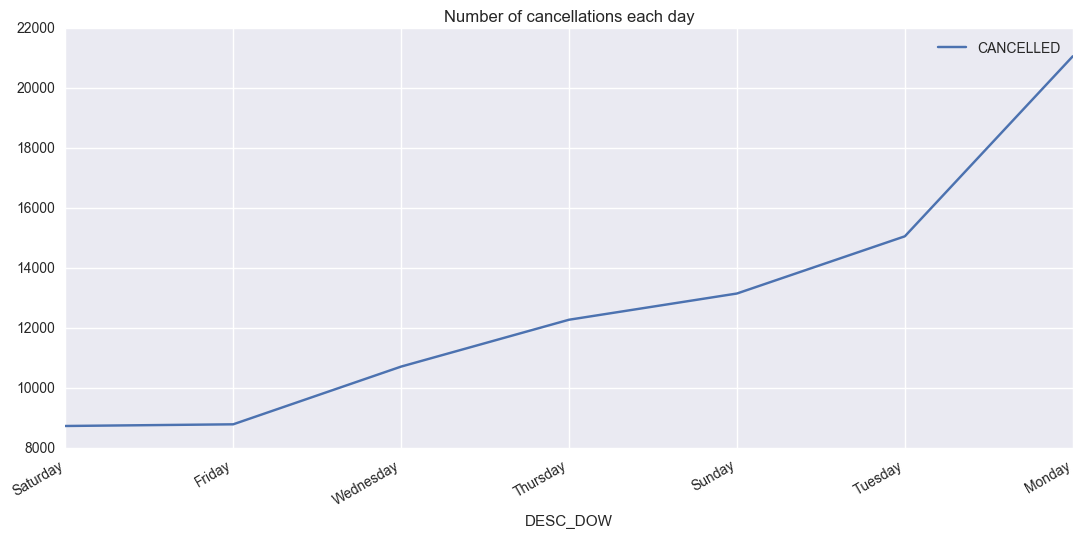

In [11]:
cancellations = pd.DataFrame(flights.groupby('DESC_DOW').sum()['CANCELLED'])
cancellations=cancellations.sort_values(['CANCELLED'],ascending =1)

cancellations.plot(kind='line',figsize=(13,6),subplots=True,legend=True)
plt.title('Number of cancellations each day')
plt.savefig('Flights_Fig9.png', dpi=300, bbox_inches="tight")


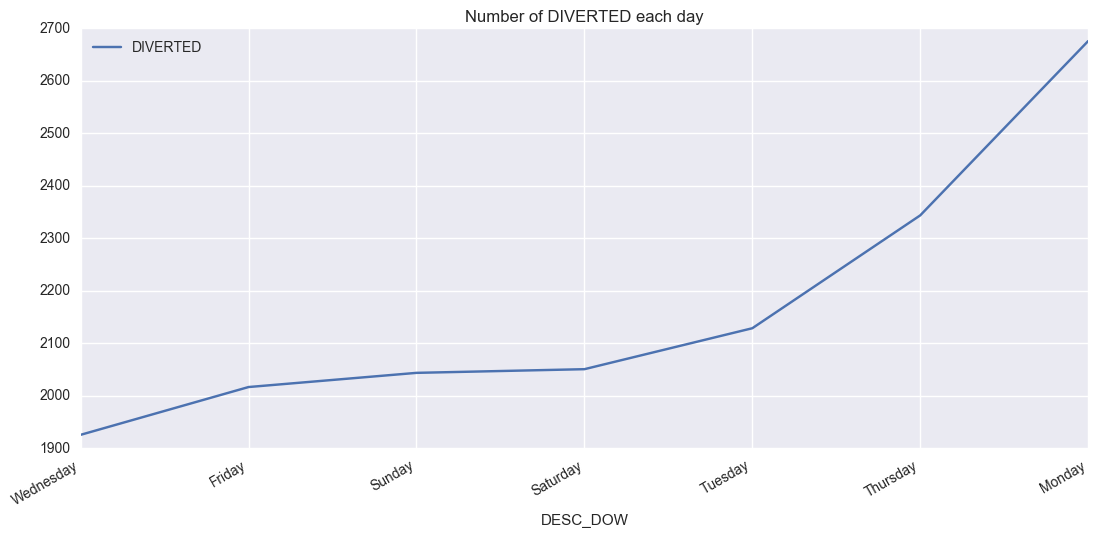

In [10]:
cancellations = pd.DataFrame(flights.groupby('DESC_DOW').sum()['DIVERTED'])
cancellations=cancellations.sort_values(['DIVERTED'],ascending =1)

cancellations.plot(kind='line',figsize=(13,6),subplots=True,legend=True)
plt.title('Number of DIVERTED each day')
plt.savefig('Flights_Fig20.png', dpi=300, bbox_inches="tight")


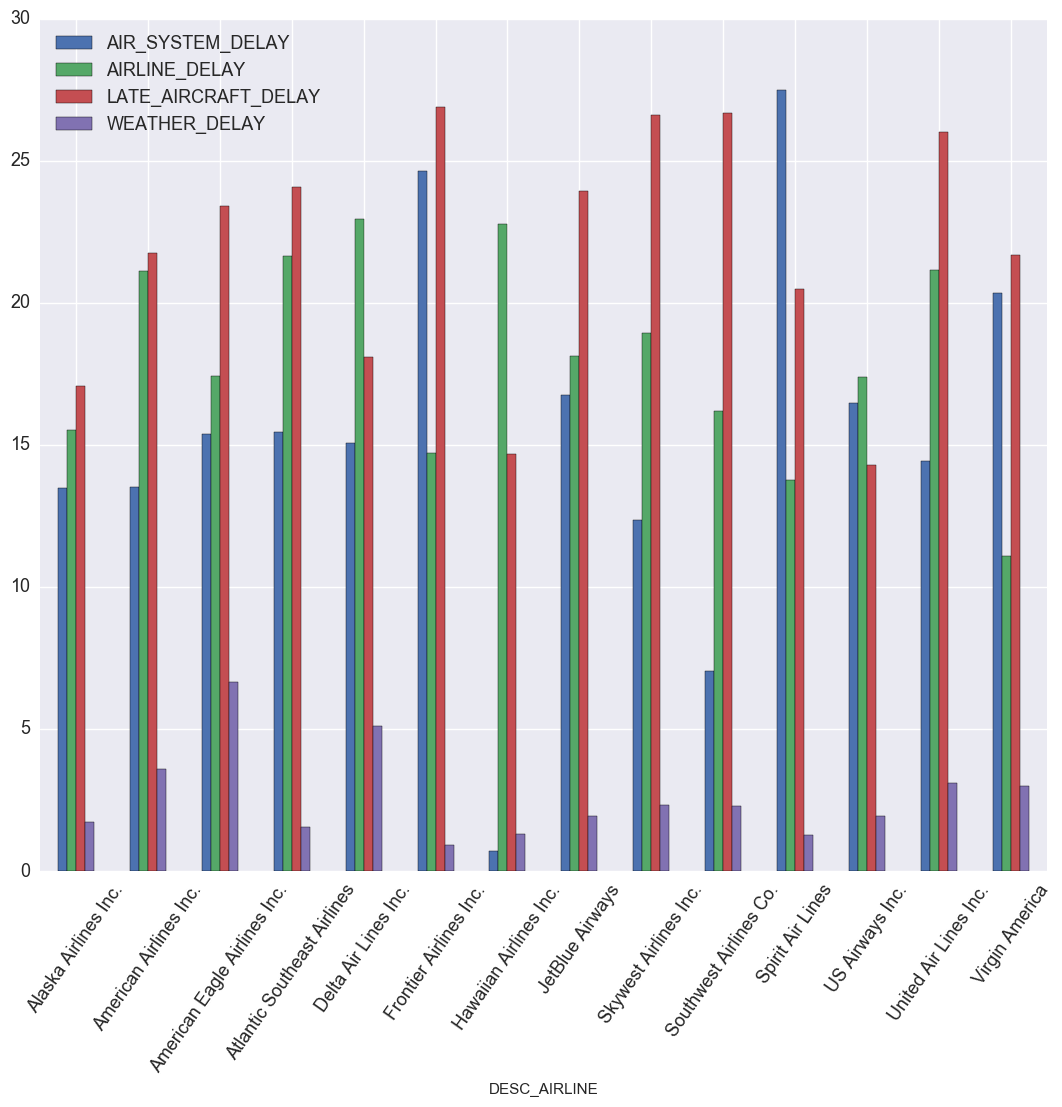

In [8]:
cancellation_reason = pd.DataFrame(flights.groupby(['DESC_AIRLINE'])['AIR_SYSTEM_DELAY', 'AIRLINE_DELAY',
                                               'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'].mean())
# flight_volume_airline_day = flights.pivot_table(index="DESC_DOW",columns="DESC_AIRLINE",values="SCHEDULED_DEPARTURE",aggfunc=lambda x:x.count())
cancellation_reason.head()
cancellation_reason.plot.bar(legend = True,figsize = (13,11),rot=55)
plt.legend(loc=2,prop={'size':13})
plt.tick_params(labelsize = 13)
